# Nubank data challenge - Fraud Analysis
## by Adriano Freitas

In [1]:
%%capture

""" Useful notebook definitions

Some usefull notebook definitions, like plots color scheme
and cell behavior were extracted to another notebook just
for a cleaner view
"""
%run ./utils.ipynb

# n_cores = cpu_count()

default_color = 'purple'
# default_light_color = 'white'
# default_dark_color = 'rebeccapurple'
colormap = 'BuPu'

## Importing data and first look

In [2]:
new_data_path = '../data/interim/'

In [3]:
df_name = new_data_path + 'acquisition_train.csv'

In [4]:
df = pd.read_csv(df_name)
df.shape
df.info()
df.describe()
df.head()

(45000, 53)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 53 columns):
ids                                                 45000 non-null object
target_default                                      41741 non-null object
score_1                                             44438 non-null object
score_2                                             44438 non-null object
score_3                                             44438 non-null float64
score_4                                             45000 non-null float64
score_5                                             45000 non-null float64
score_6                                             45000 non-null float64
risk_rate                                           44438 non-null float64
last_amount_borrowed                                15044 non-null float64
last_borrowed_in_months                             15044 non-null float64
credit_limit                                        31200 non-null flo

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code,member_since,total_spent,total_revolving,total_minutes,total_card_requests,total_months,avg_spend,total_revolving_months,credit_line
count,44438.00,45000.00,45000.00,45000.00,44438.00,15044.00,15044.00,31200.00,44438.00,18455.00,44303.00,44426.00,44438.00,33456.00,45000.00,22372.00,45000.00,29876.00,42767.00,45000.00,44933.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00
mean,347.98,100.01,0.50,99.93,0.30,13782.34,41.76,34381.95,71607.39,35.07,0.08,0.00,10.70,11.07,247.54,0.00,1.50,0.50,12.53,500.40,10325415545677.84,33923.51,14.20,62730.38,10485.41,60.83,2.02,21.80,2871.45,14.99,6441.68
std,110.43,3.18,0.29,10.02,0.10,8077.57,10.25,36586.98,51858.97,21.66,0.27,0.08,4.59,4.60,146.12,0.00,1.11,0.50,126.53,287.97,nan,12692.41,8.62,55683.17,10782.67,38.93,1.07,8.62,2139.26,6.35,4556.10
min,0.00,86.19,0.00,60.66,0.00,1005.18,36.00,0.00,4821.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-999.00,0.00,403.00,12001.00,0.00,36.89,0.00,0.00,1.00,3.00,12.30,0.00,506.00
25%,270.00,97.87,0.25,93.20,0.22,7519.50,36.00,10000.00,45010.78,17.00,0.00,0.00,7.00,8.00,120.00,0.00,1.00,0.00,11.00,252.00,50856.00,22937.00,7.00,22840.29,2883.60,31.04,1.00,15.00,1225.93,10.00,2949.00
50%,340.00,100.02,0.50,99.97,0.29,12023.47,36.00,25647.00,61266.76,32.00,0.00,0.00,10.00,10.00,248.00,0.00,2.00,1.00,27.00,503.00,101630.00,33896.00,14.00,45723.25,6945.92,55.82,2.00,22.00,2300.54,15.00,5302.00
75%,420.00,102.14,0.75,106.64,0.36,19220.27,36.00,47086.75,86019.23,50.00,0.00,0.00,13.00,14.00,375.00,0.00,2.00,1.00,43.00,747.00,151187.00,44910.00,21.00,84851.98,14562.21,84.84,3.00,29.00,3953.11,20.00,8737.00
max,990.00,113.98,1.00,142.19,0.90,35059.60,60.00,448269.00,5000027.83,141.00,5.00,5.00,49.00,49.00,500.00,0.00,3.00,1.00,59.00,1000.00,6355500000111444.00,56000.00,33.00,402947.54,105981.21,274.26,9.00,36.00,15705.14,33.00,20484.00


,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud,class,member_since,total_spent,total_revolving,total_minutes,total_card_requests,total_months,avg_spend,total_revolving_months,credit_line
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.00,101.80,0.26,108.43,0.40,25033.92,36.00,0.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,nan,0.00,0.00,18.00,18.00,07:52:34,444,outlook.com,nan,2,0.00,51.00,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.00,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN,C,8,23894.61,4205.69,18.89,1,28,853.38,19,1995
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.00,97.06,0.94,92.00,0.24,nan,nan,39726.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.00,0.00,0.00,14.00,14.00,02:34:29,346,gmail.com,0.00,1,0.00,17.00,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.00,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN,C,11,31435.08,5147.86,46.86,2,25,1257.40,16,2766
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.00,100.03,0.35,112.89,0.29,7207.92,36.00,nan,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,nan,0.00,0.00,10.00,nan,00:60:02,6,gmail.com,nan,2,nan,9.00,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.00,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN,C,25,6976.90,2013.24,19.98,3,11,634.26,7,2537
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.00,101.60,0.99,94.90,0.32,nan,nan,54591.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,nan,1.00,0.00,19.00,19.00,11:20:49,406,spgov.com,nan,3,nan,38.00,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.00,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN,C,10,100809.00,16696.20,51.65,3,26,3877.27,17,8212
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.00,98.47,0.53,118.13,0.18,nan,nan,nan,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,nan,0.00,0.00,11.00,nan,13:39:03,240,gmail.com,0.00,2,1.00,46.00,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.00,BR-MT,52827,

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


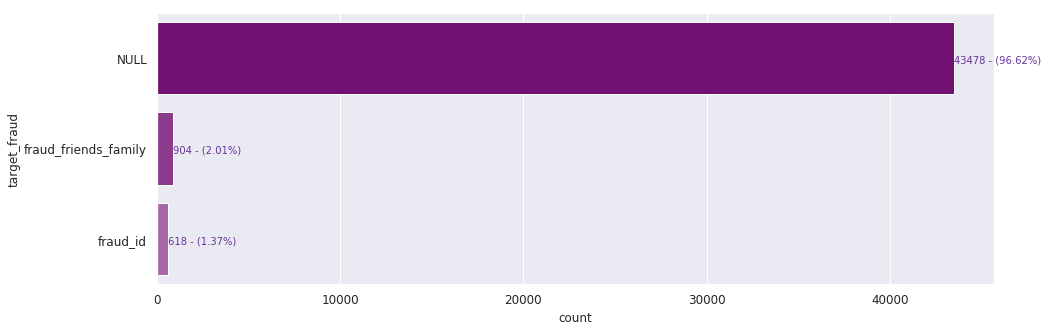

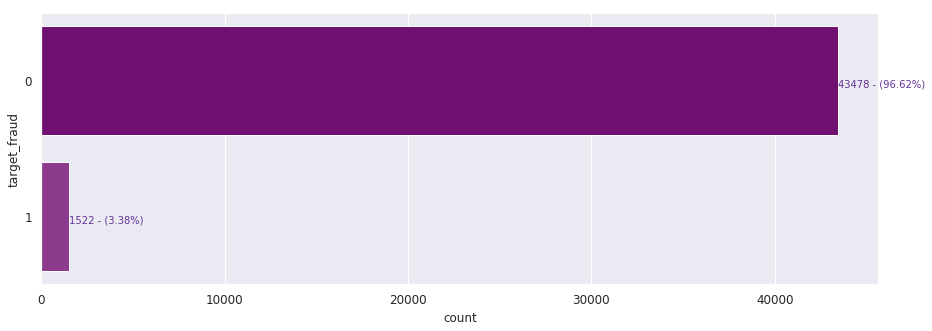

In [5]:
# nulls on target
plot_count(df, 'target_fraud')
df['target_fraud'].fillna('-1', inplace=True)
df['target_fraud'] = df['target_fraud'].apply(lambda x: 0 if x == '-1' else 1)
plot_count(df, 'target_fraud')

### Missing values

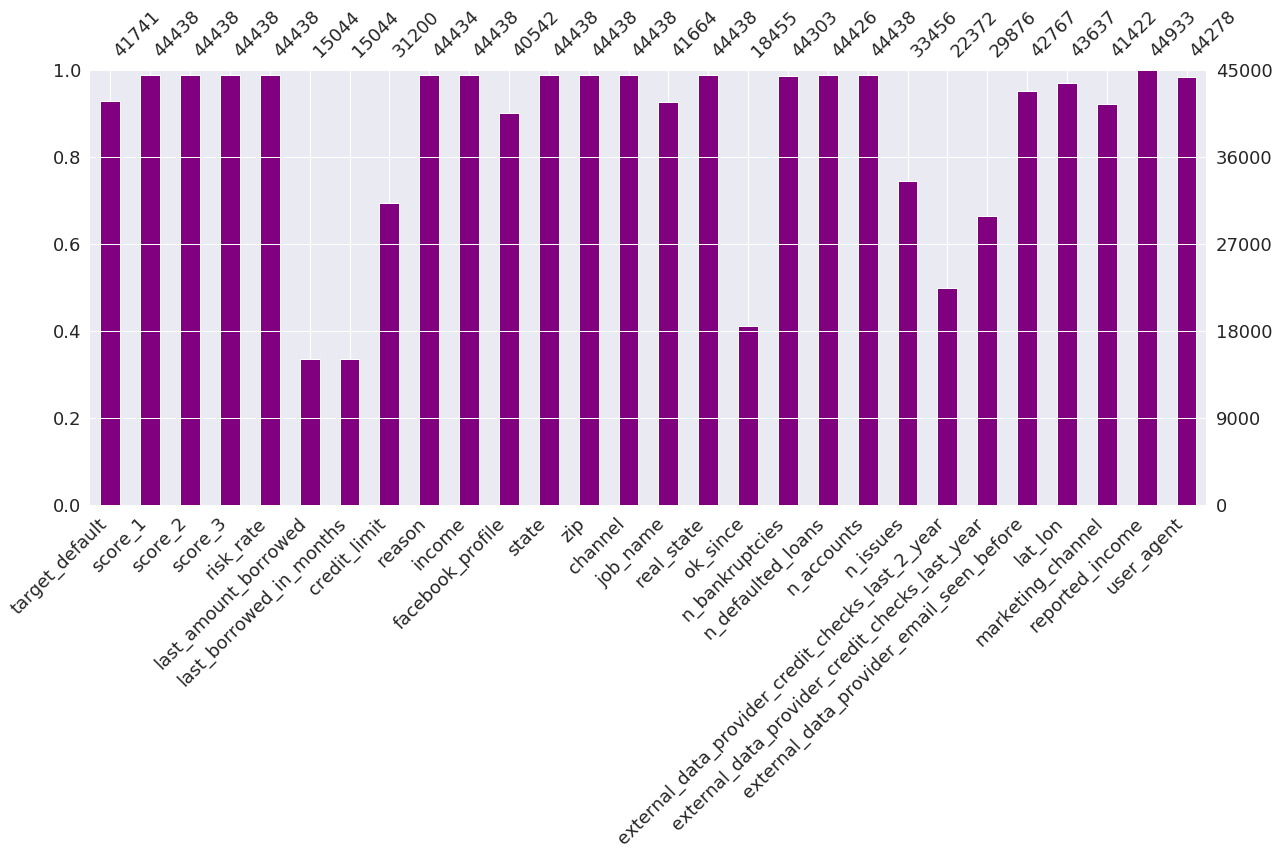

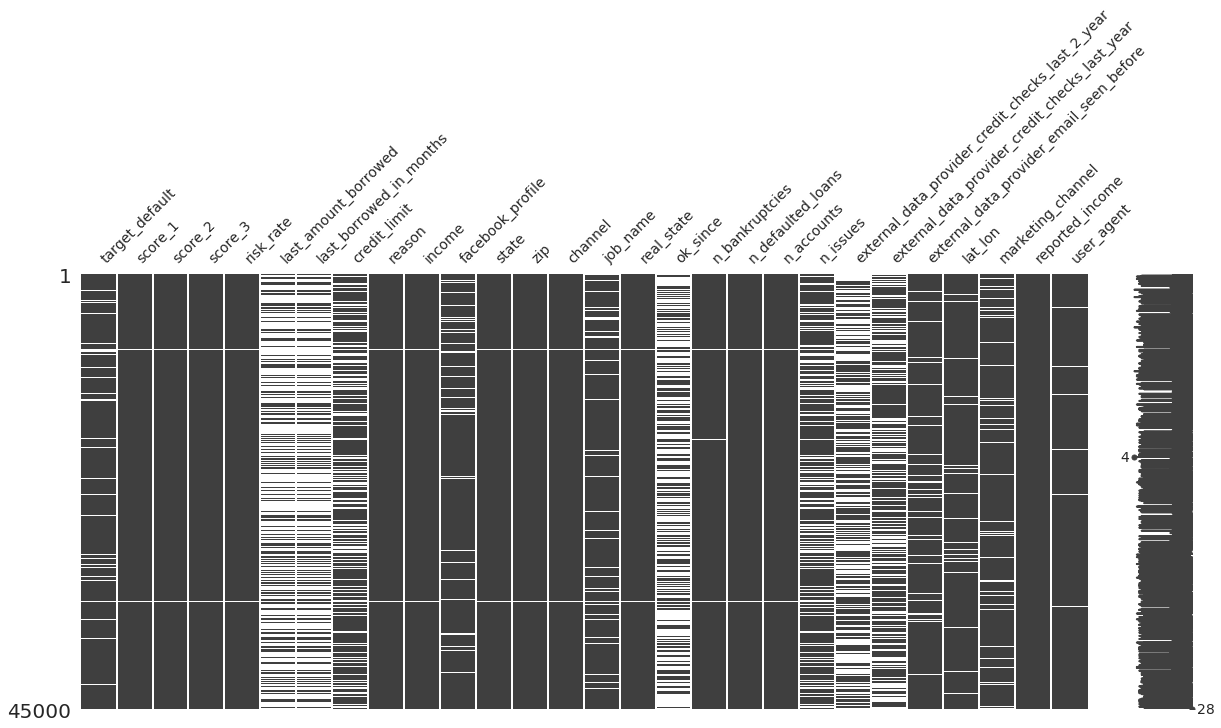

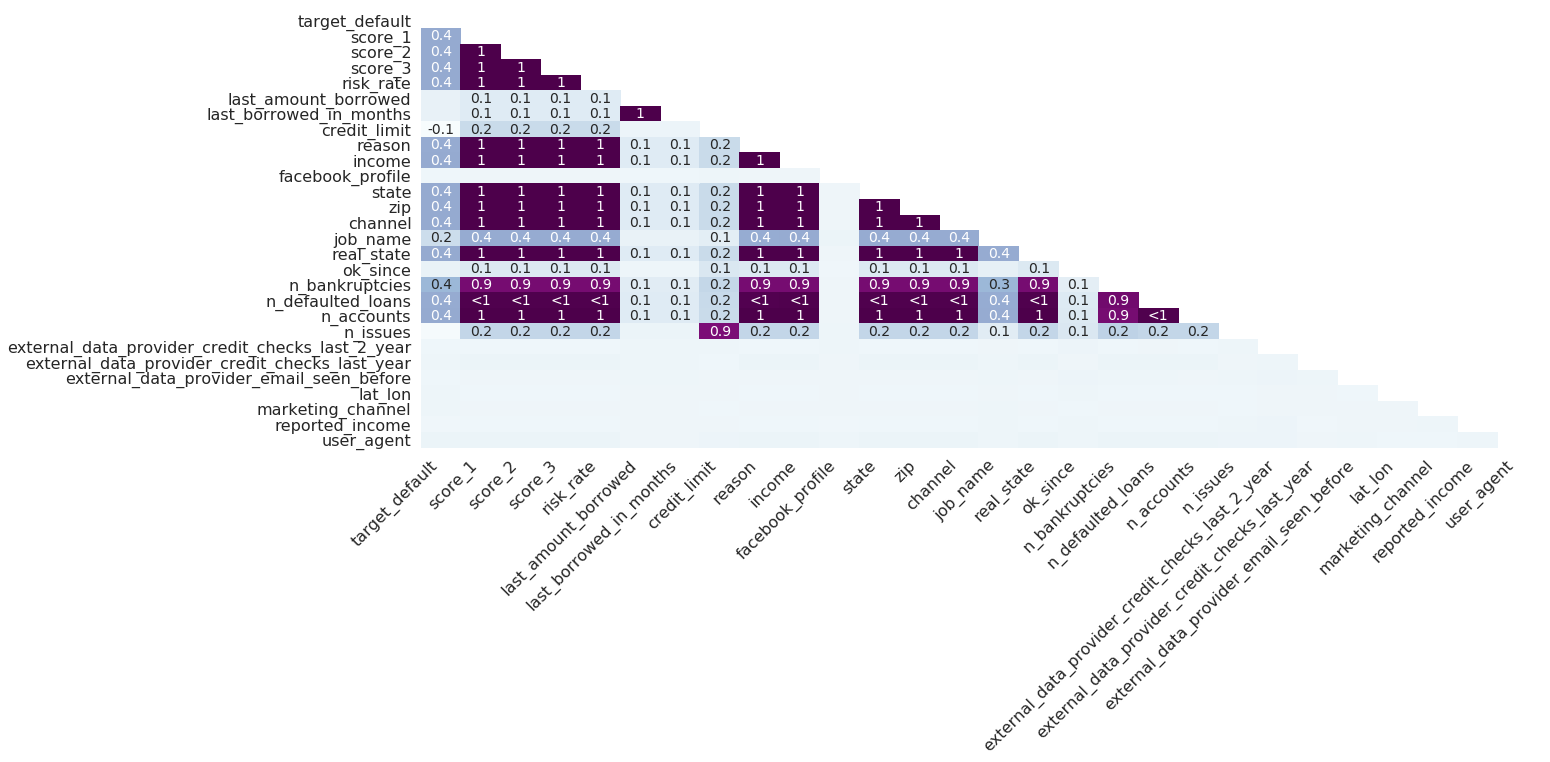

In [6]:
missing_value_columns = df.columns[df.isnull().any()].tolist()
df_missing = df[missing_value_columns]

msno.bar(df_missing,figsize=(20,8),color=default_color,fontsize=18,labels=True)
msno.matrix(df_missing,figsize=(20,8),fontsize=14)
msno.heatmap(df_missing,figsize=(20,8),cmap=colormap)

### Pearson correlation matrix

<Figure size 1296x1152 with 0 Axes>

Text(0.5,1.05,'Pearson correlation of continuous features')

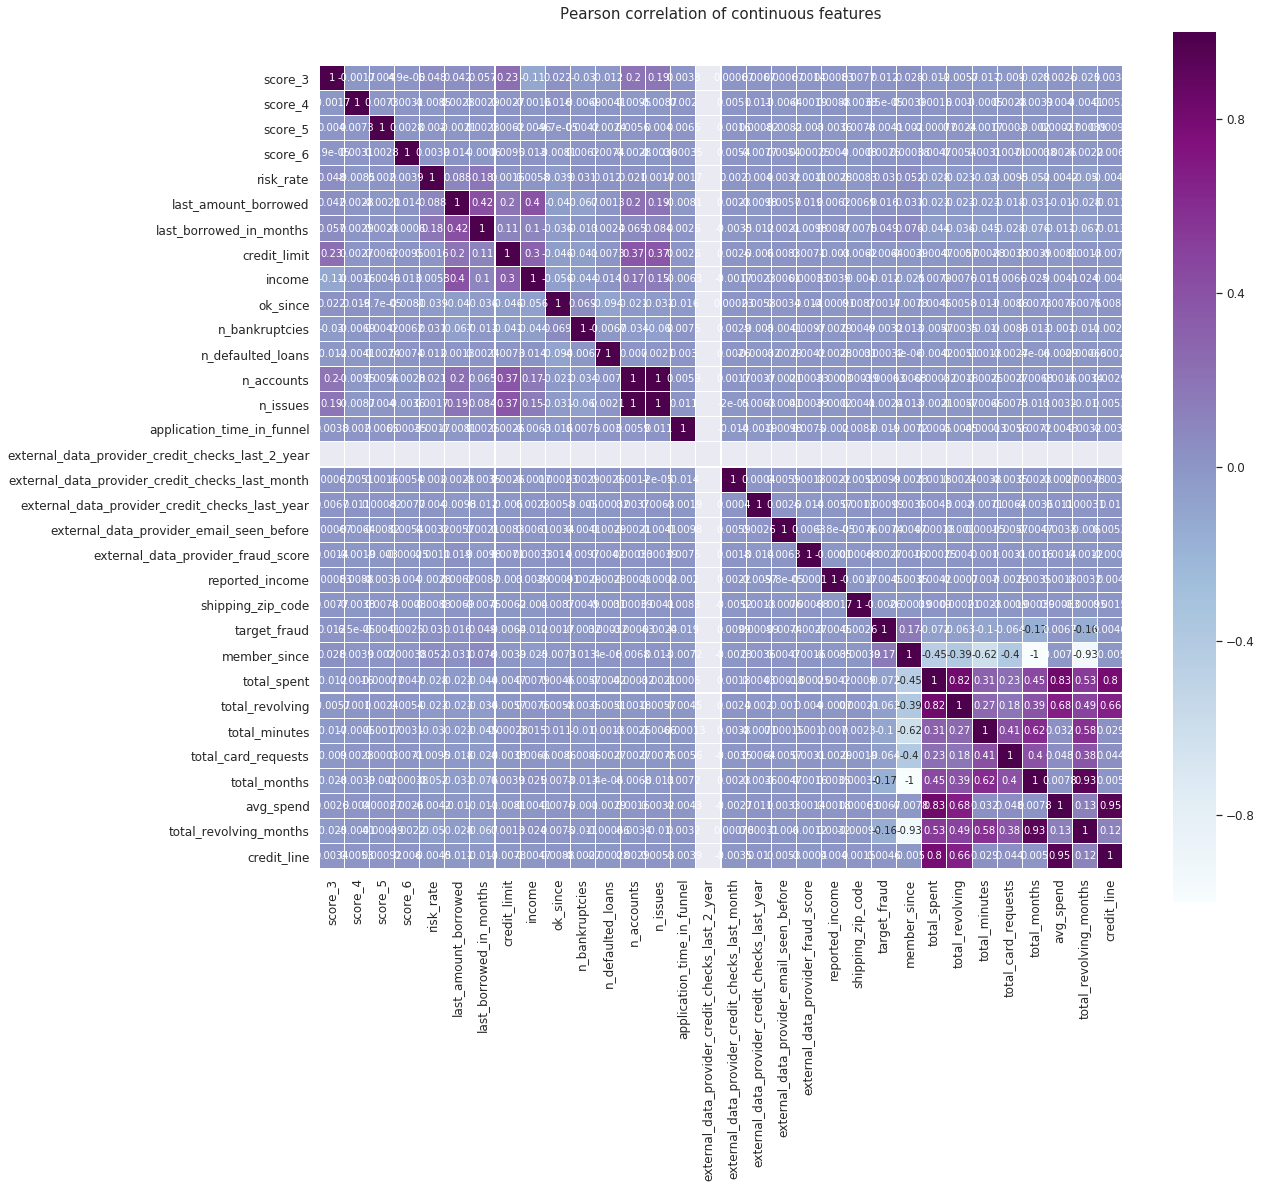

In [7]:
plt.figure(figsize=(18,16))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

### Drop features

This features do not contribute too much to this model, let's drop them.

In [8]:
# unecessary columns
drop_cols = [
            'ids', 'credit_limit', 'channel', 'reason', 'job_name', 'reason'
            'external_data_provider_first_name', 'profile_phone_number',
            'avg_spend', 'target_default', 'facebook_profile', 'profile_tags',
            'last_amount_borrowed', 'last_borrowed_in_months',
            'zip', 'email', 'user_agent', 'n_issues',
            'application_time_applied', 'application_time_in_funnel',
            'external_data_provider_credit_checks_last_2_year',
            'external_data_provider_credit_checks_last_month',
            'external_data_provider_credit_checks_last_year',
            'external_data_provider_first_name',
            'class', 'member_since', 'credit_line',
            'total_spent', 'total_revolving', 'total_minutes', 
            'total_card_requests', 'total_months', 'total_revolving_months']

for col in drop_cols:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)

        

### Dealing with Missing values

First let's take a look into missing values. Them let's treat each one in the best way possible.

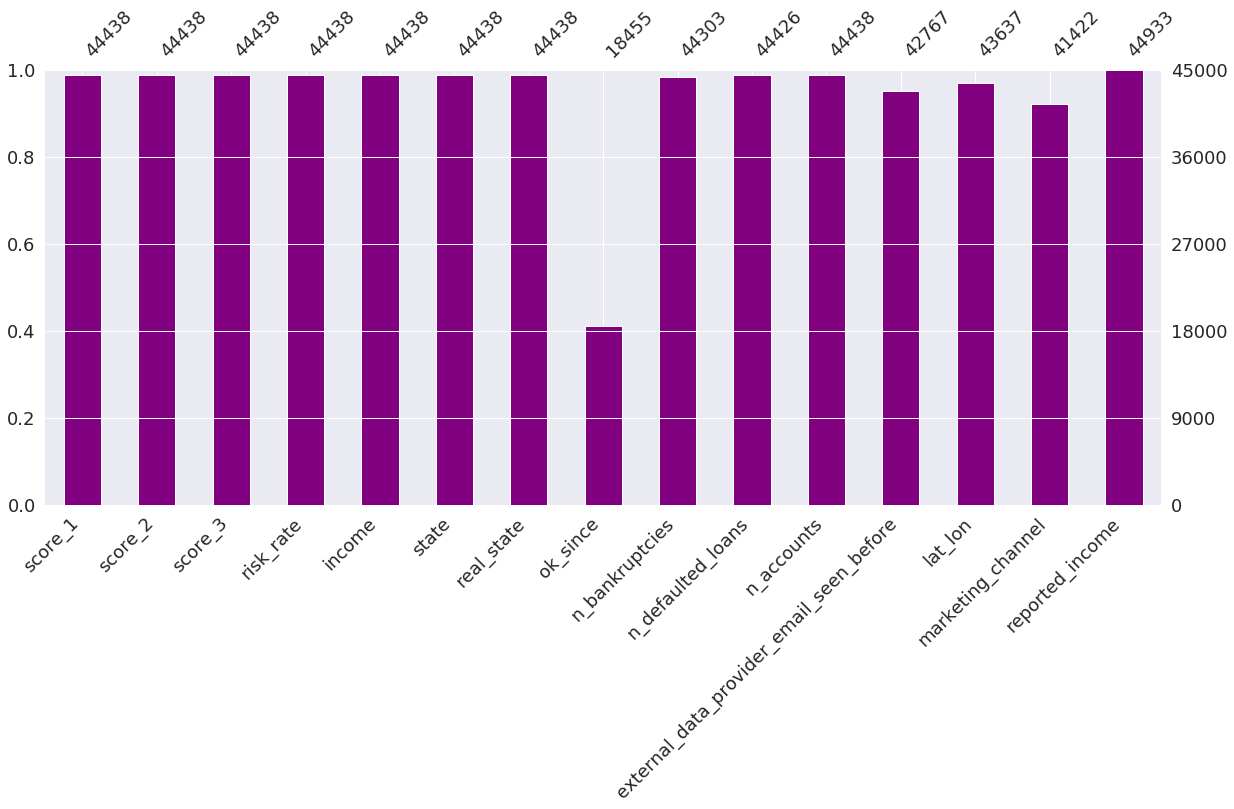

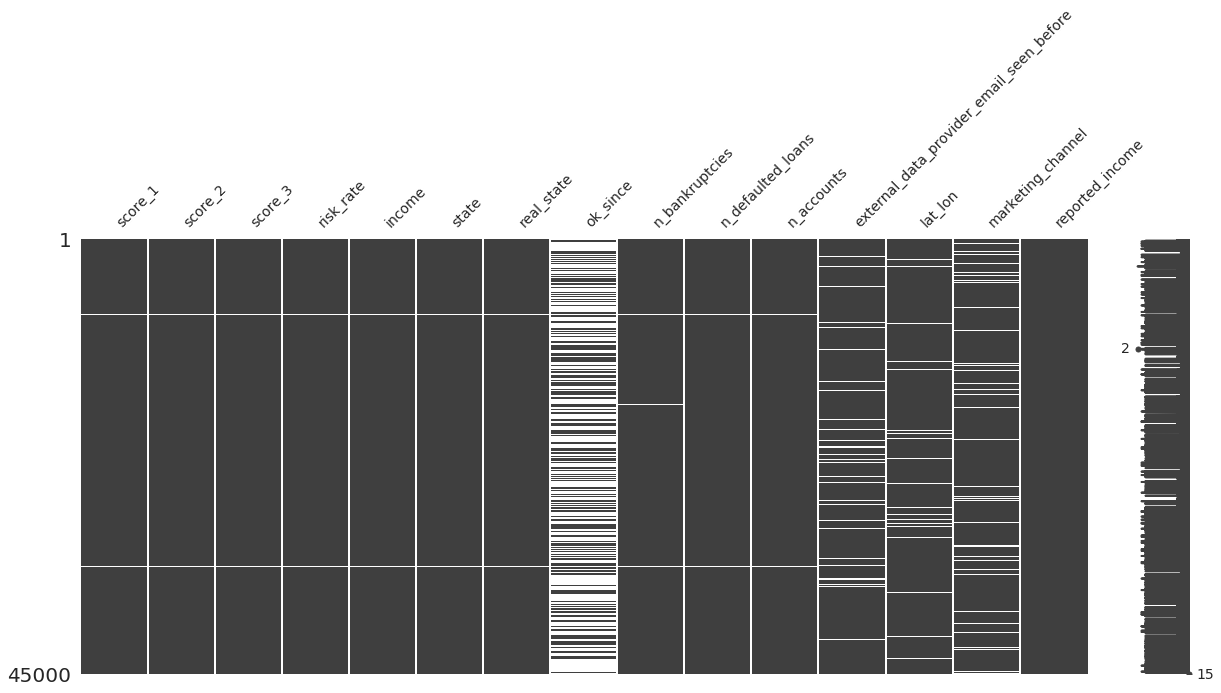

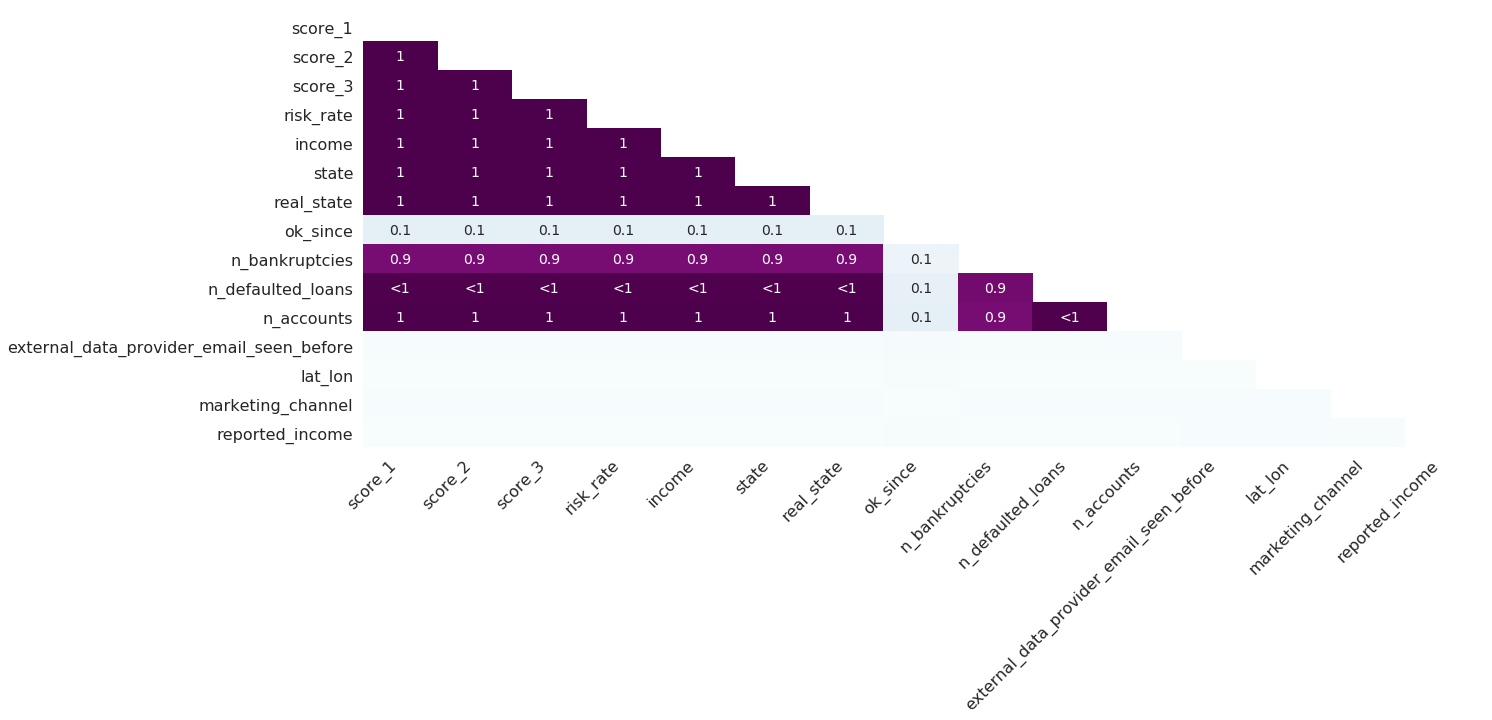

In [9]:
missing_value_columns = df.columns[df.isnull().any()].tolist()
df_missing = df[missing_value_columns]

msno.bar(df_missing,figsize=(20,8),color=default_color,fontsize=18,labels=True)
msno.matrix(df_missing,figsize=(20,8),fontsize=14)
msno.heatmap(df_missing,figsize=(20,8),cmap=colormap)

### Fill nulls

In [10]:
# fill nulls
df['ok_since'].fillna((df['ok_since'].mean()), inplace=True)
df['n_bankruptcies'].fillna(-1, inplace=True)
df['n_defaulted_loans'].fillna(-1, inplace=True)
df['external_data_provider_email_seen_before'].fillna((df['external_data_provider_email_seen_before'].mean()), inplace=True)
df['reported_income'].fillna((df['reported_income'].mean()), inplace=True)
df['marketing_channel'].fillna('NA', inplace=True)
df['lat_lon'].fillna('(0,0)', inplace=True)

### Lat Lon

Let's transform lat_lon into two separate columns

In [11]:
# lat lon
df['lat'] = df['lat_lon'].apply(lambda x: ast.literal_eval(x)[0])
df['lon'] = df['lat_lon'].apply(lambda x: ast.literal_eval(x)[1])
df.drop('lat_lon', axis=1, inplace=True)

### Drop the rest of missing values

First let's take a look into missing values. Them let's treat each one in the best way possible.

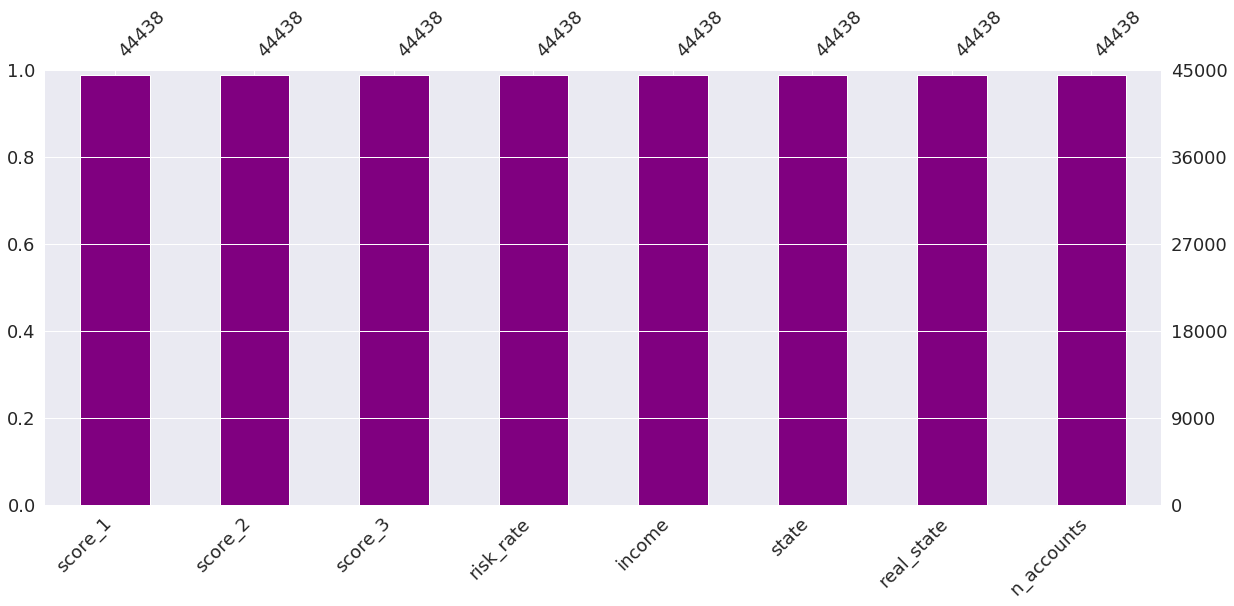

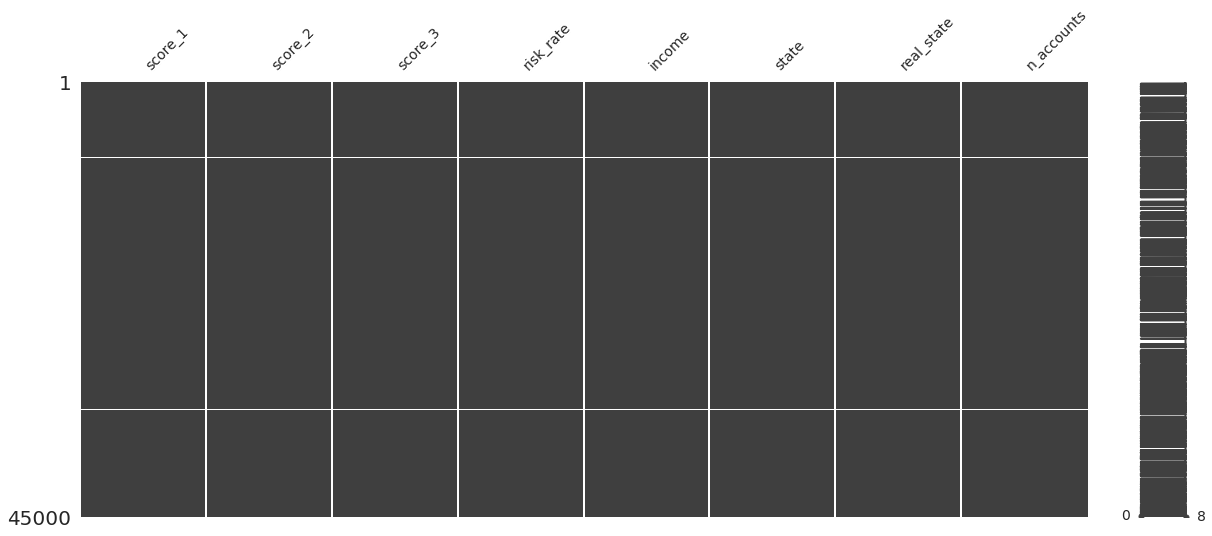

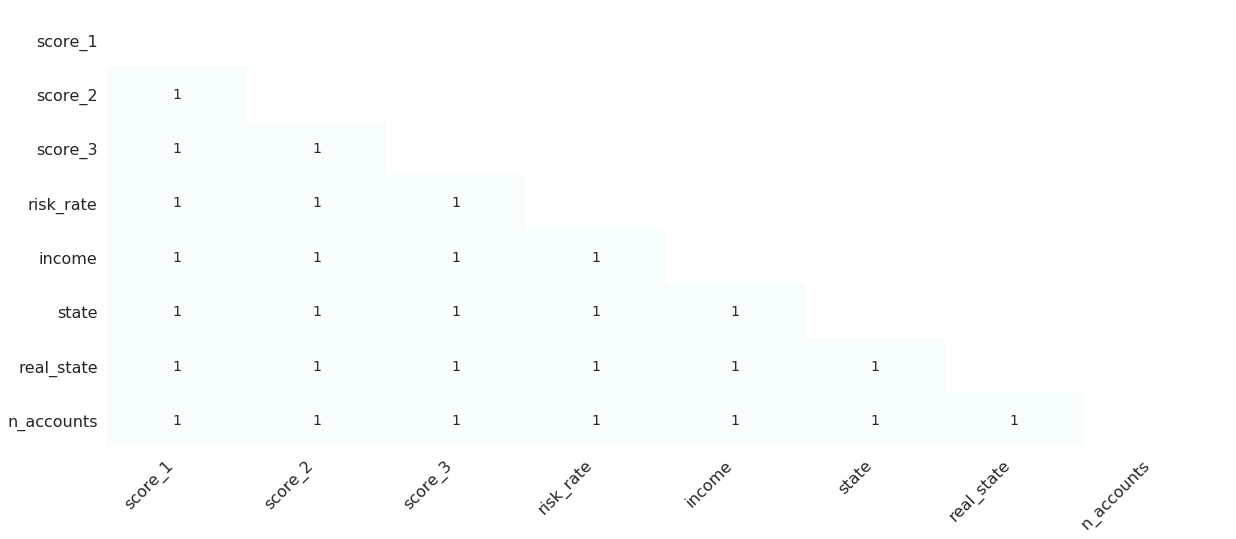

In [12]:
missing_value_columns = df.columns[df.isnull().any()].tolist()
if len(missing_value_columns) > 0:
    df_missing = df[missing_value_columns]

    msno.bar(df_missing,figsize=(20,8),color=default_color,fontsize=18,labels=True)
    msno.matrix(df_missing,figsize=(20,8),fontsize=14)
    msno.heatmap(df_missing,figsize=(20,8),cmap=colormap)
else:
    print('No Missing values')

In [13]:
df.dropna(inplace=True)
df.shape

(44438, 23)

### Encoding categorical columns

In [14]:
encode_columns = [
    'score_1', 'score_2', 'reason', 'state', 'job_name',
    'real_state', 'marketing_channel', 'shipping_state', 
    'shipping_zip_code'
]
l_e = LabelEncoder()
for col in encode_columns:
    if col in df.columns:
        df[col] = l_e.fit_transform(df[col])

<Figure size 1296x1152 with 0 Axes>

Text(0.5,1.05,'Pearson correlation of continuous features')

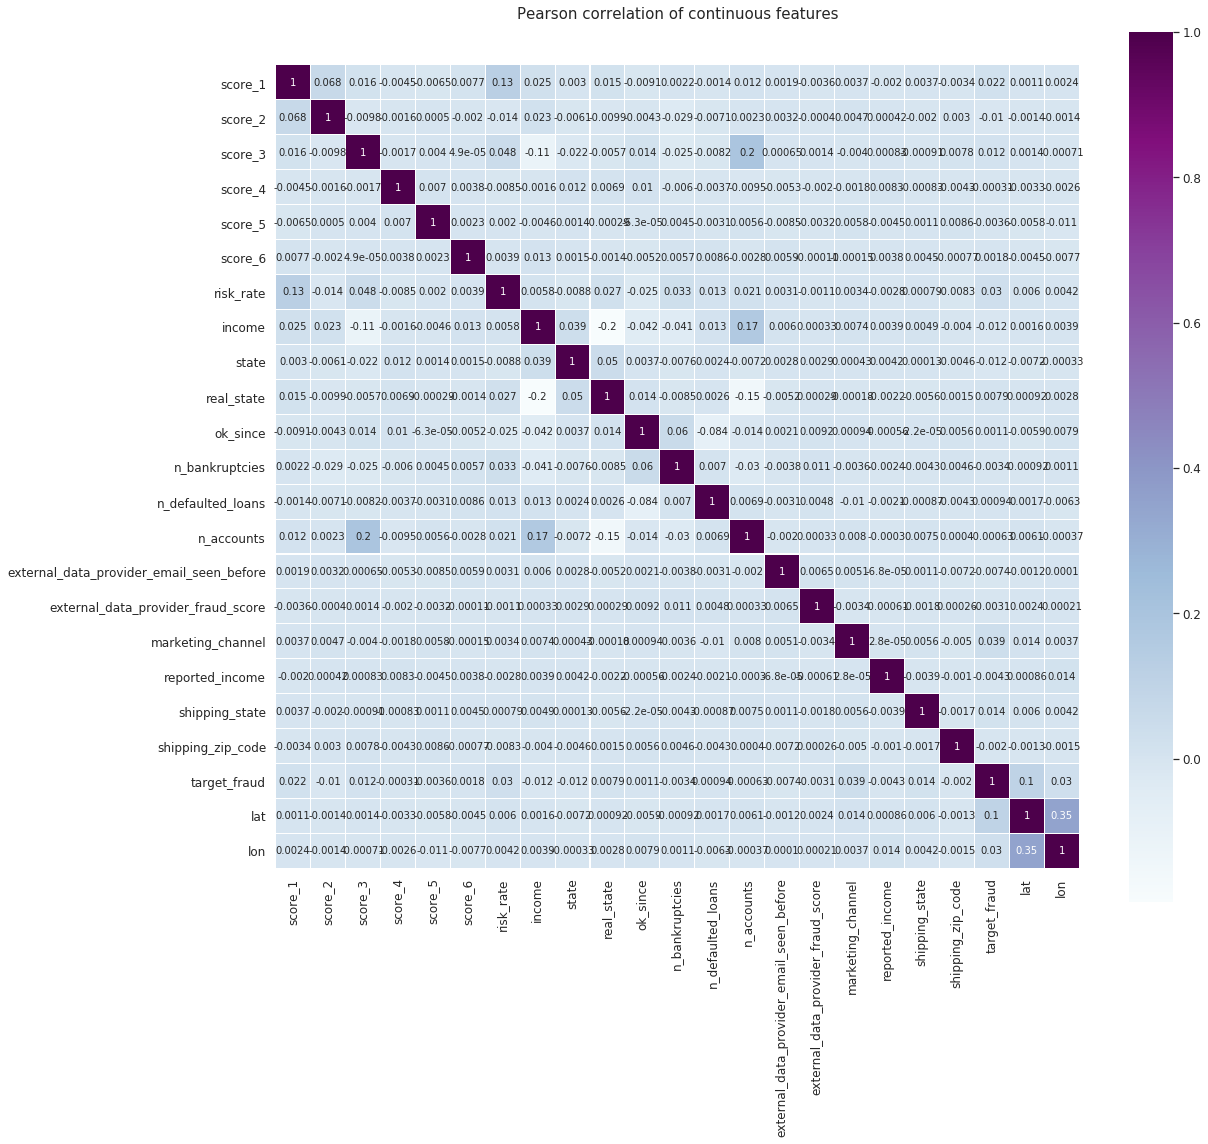

In [15]:
plt.figure(figsize=(18,16))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [16]:
one_hot = {c: list(df[c].unique()) for c in df.columns if c not in ['target_default']}
df = OHE_by_unique(df, one_hot, 7)

## Creating X and y and trainning models

In [17]:
X = df.drop('target_fraud',axis=1)
y = df['target_fraud']

### XGBoost

In [18]:
xgb_params = {}
xgb_params['learning_rate'] = 0.01
xgb_params['n_estimators'] = 750
xgb_params['max_depth'] = 6
xgb_params['colsample_bytree'] = 0.6
xgb_params['min_child_weight'] = 0.6

In [19]:
xgb_model = XGBClassifier(**xgb_params)

In [20]:
X_train, y_train, X_val, y_val = cross_val_model(X, y, xgb_model)

Fit XGBClassifier fold 1
    y train:  Counter({0.0: 28634, 1.0: 991})
    y test:   Counter({0.0: 14317, 1.0: 496})
    cross_score: 0.86319
[[14301    16]
 [  486    10]]
Fit XGBClassifier fold 2
    y train:  Counter({0.0: 28634, 1.0: 991})
    y test:   Counter({0.0: 14317, 1.0: 496})
    cross_score: 0.87425
[[14306    11]
 [  483    13]]
Fit XGBClassifier fold 3
    y train:  Counter({0.0: 28634, 1.0: 992})
    y test:   Counter({0.0: 14317, 1.0: 495})
    cross_score: 0.86164
[[14299    18]
 [  483    12]]


### Random Forest

In [21]:
# RandomForest params
rf_params = {}
rf_params['n_estimators'] = 200
rf_params['max_depth'] = 6
rf_params['min_samples_split'] = 70
rf_params['min_samples_leaf'] = 30

In [22]:
rf_model = RandomForestClassifier(**rf_params)

In [23]:
cross_val_model(X, y, rf_model)

Fit RandomForestClassifier fold 1
    y train:  Counter({0.0: 28634, 1.0: 991})
    y test:   Counter({0.0: 14317, 1.0: 496})
    cross_score: 0.83970
[[14317     0]
 [  496     0]]
Fit RandomForestClassifier fold 2
    y train:  Counter({0.0: 28634, 1.0: 991})
    y test:   Counter({0.0: 14317, 1.0: 496})
    cross_score: 0.85199
[[14317     0]
 [  496     0]]
Fit RandomForestClassifier fold 3
    y train:  Counter({0.0: 28634, 1.0: 992})
    y test:   Counter({0.0: 14317, 1.0: 495})
    cross_score: 0.83281
[[14317     0]
 [  495     0]]


(array([[  0.,  10., 350., ...,   0.,   0.,   0.],
        [  3.,  16., 370., ...,   0.,   0.,   0.],
        [  0.,  21., 510., ...,   0.,   0.,   0.],
        ...,
        [  6.,  31., 370., ...,   0.,   0.,   0.],
        [  4.,  24., 280., ...,   0.,   0.,   0.],
        [  6.,   5., 240., ...,   0.,   0.,   0.]], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([[  3.,   9., 360., ...,   0.,   0.,   0.],
        [  2.,   1., 300., ...,   0.,   0.,   0.],
        [  0.,  21., 250., ...,   0.,   0.,   0.],
        ...,
        [  3.,  15., 210., ...,   0.,   0.,   0.],
        [  0.,   2., 620., ...,   0.,   0.,   0.],
        [  2.,  34., 530., ...,   0.,   0.,   0.]], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32))

## Stacked models

Why not use both together?

In [24]:
log_model = LogisticRegression()

In [25]:
stack = Ensemble(n_splits=3,
        stacker = log_model,
        base_models = (rf_model, xgb_model))

In [26]:
y_pred = stack.fit_predict(X, y, X)

Fit RandomForestClassifier fold 1
Fit RandomForestClassifier fold 2
Fit RandomForestClassifier fold 3
Fit XGBClassifier fold 1
Fit XGBClassifier fold 2
Fit XGBClassifier fold 3
Stacker score: 0.87706
[[42773   178]
 [ 1421    66]]


## Imbalanced learning

Let's balance this dataset using the technique called SMOTE technique (https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis#SMOTE)

In [27]:
X = df.drop('target_fraud',axis=1)
y = df['target_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
smt = SMOTE(random_state=42, k_neighbors=1)
X_SMOTE, y_SMOTE = smt.fit_sample(X_train, y_train)

In [29]:
stack.fit(X_SMOTE, y_SMOTE)

Fit RandomForestClassifier fold 1
Fit RandomForestClassifier fold 2
Fit RandomForestClassifier fold 3
Fit XGBClassifier fold 1
Fit XGBClassifier fold 2
Fit XGBClassifier fold 3
Stacker score: 0.99343
[[34022   334]
 [ 1165 33191]]


In [30]:
y_pred = stack.predict(X_test)
confusion_matrix(y_test, np.rint(y_pred))

array([[8501,   94],
       [ 272,   21]])